# Handwritten Digits Classification(Neural Network)

<img src="Images/intro.png"></img>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import models, layers
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# Data

In [3]:
dataset = keras.datasets.mnist.load_data()

## Train/Test Split

In [4]:
(X_train, y_train), (X_test, y_test) = dataset

In [5]:
len(X_train), len(X_test)

(60000, 10000)

## Data exploration

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

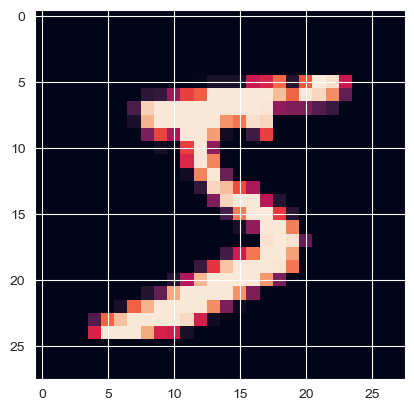

In [7]:
plt.imshow(X_train[0])

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Flatten Image data to 1D Array: [0,0,3,18,32...]

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

# Simple Neural Network
* Input Layer: 784 nodes(28*28)
* Output Layer: 10(1,2,3...10)

In [11]:
model = models.Sequential([
    layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Metal device set to: Apple M1 Pro


2023-03-19 09:29:13.140609: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-19 09:29:13.140633: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-03-19 09:29:13.466074: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-19 09:29:13.622537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 9.3987 - accuracy: 0.8416
Epoch 2/5
 305/1875 [===>..........................] - ETA: 5s - loss: 5.9264 - accuracy: 0.8819

KeyboardInterrupt: 

## Scale the data and compare model accuracy

In [ ]:
X_train_scaled = X_train /255
X_test_scaled = X_test /255
X_train_scaled_flattened = X_train_scaled.reshape(len(X_train_scaled), 28*28)
X_test_scaled_flattened = X_test_scaled.reshape(len(X_test_scaled), 28*28)
X_train_scaled[0]

In [ ]:
model = models.Sequential([
    layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_scaled_flattened, y_train, epochs=5)

We increased accuracy through scaling the data from 0.88 to 0.92

## Evaluate Model on Test Data

In [ ]:
model.evaluate(X_test_scaled_flattened, y_test)

## Prediction

In [ ]:
plt.imshow(X_test[6])

In [ ]:
y_pred = model.predict(X_test_scaled_flattened)

In [ ]:
np.argmax(y_pred[6])

# Model Evaluation

## Confusion Matrix

In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

In [ ]:
y_test[:5]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Adding a hidden layer to Model

In [ ]:
model = models.Sequential([
    layers.Dense(100, input_shape=(784,), activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_scaled_flattened, y_train, epochs=10)

In [ ]:
model.evaluate(X_test_scaled_flattened, y_test)

We improved our model by adding a hidden layer from 92% to 97%

# Automatically flatten data in model
Flatten data using keras.layers.Flatten() so we do not have to call .reshape on our input dataset

In [15]:
model = models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
# TensorBoard Callback
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/adam", histogram_freq=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
   3/1875 [..............................] - ETA: 46s - loss: 116.3319 - accuracy: 0.1562 

2023-03-19 09:37:14.681482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 2.7468 - accuracy: 0.8604
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6022 - accuracy: 0.9202
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4924 - accuracy: 0.9374
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4298 - accuracy: 0.9454
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3982 - accuracy: 0.9519


# TensorBoard
Run in terminal: tensorboard --logdir logs/